In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()

df=pd.read_csv("../data/processed/cleaned_ecommerce_sales_data.csv")
df.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Quantity          int64
Sales             int64
Profit          float64
Year              int64
Month             int64
Month Name       object
Quarter          object
dtype: object

In [2]:
df.head(5)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Month Name,Quarter
0,2024-12-31,Printer,Office,North,4,3640,348.93,2024,12,December,2024Q4
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,2022,11,November,2022Q4
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,2022,5,May,2022Q2
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,2024,3,March,2024Q1
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,2022,9,September,2022Q3


In [4]:
# Convert Order date back to datetime

df['Order Date']=pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Month Name,Quarter
0,2024-12-31,Printer,Office,North,4,3640,348.93,2024,12,December,2024Q4
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,2022,11,November,2022Q4
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,2022,5,May,2022Q2
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,2024,3,March,2024Q1
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,2022,9,September,2022Q3


   Year  Month   Sales    Profit
0  2022      1  341544  63827.33
1  2022      2  208775  34084.90
2  2022      3  294660  51931.81
3  2022      4  230624  44260.45
4  2022      5  314295  53504.97


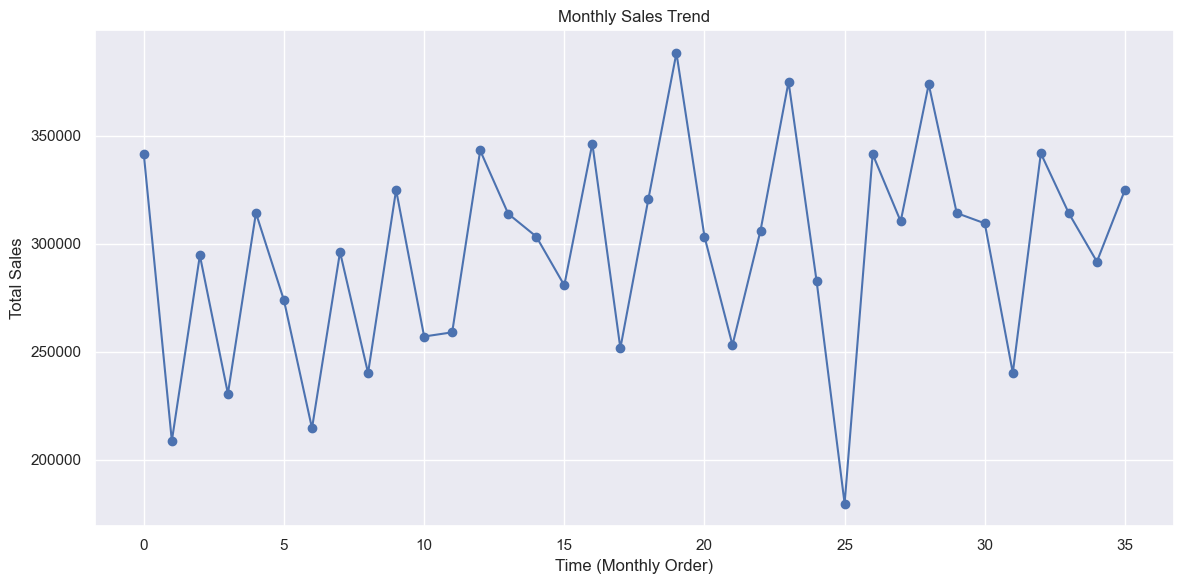

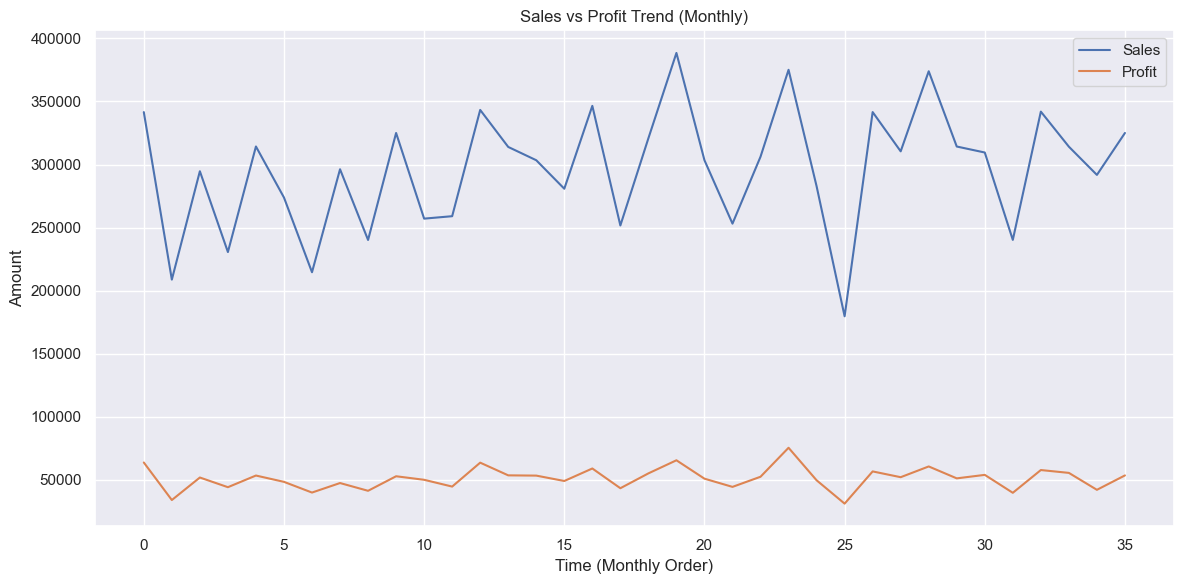

In [14]:
# Monthly sales and Profit trend
monthly_trend=(
    df.groupby(['Year','Month'])
    .agg({'Sales':'sum','Profit':'sum'})
    .reset_index()
)

print(monthly_trend.head())

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['Sales'],marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Time (Monthly Order)")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Combine Sales & Profit
plt.figure(figsize=(12,6))
plt.plot(monthly_trend['Sales'], label='Sales')
plt.plot(monthly_trend['Profit'], label='Profit')
plt.title("Sales vs Profit Trend (Monthly)")
plt.xlabel("Time (Monthly Order)")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

      Category    Sales     Profit  Quantity
0  Accessories  4247591  736084.74      6917
1  Electronics  5326074  923185.59      8610
2       Office  1094216  185394.88      1734


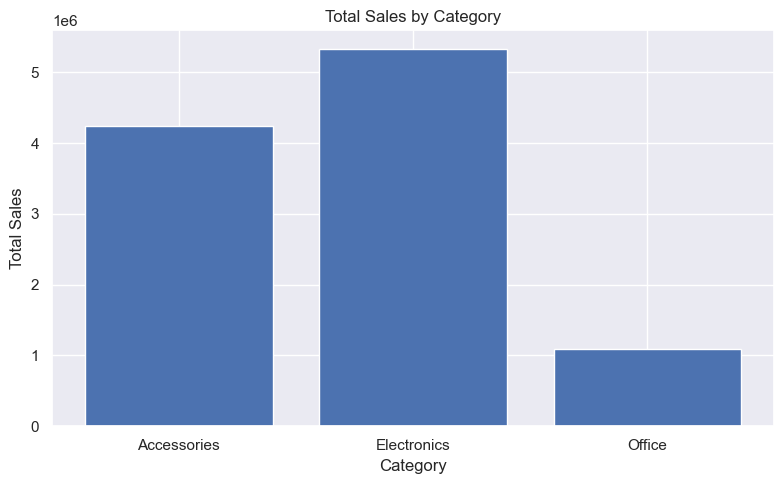

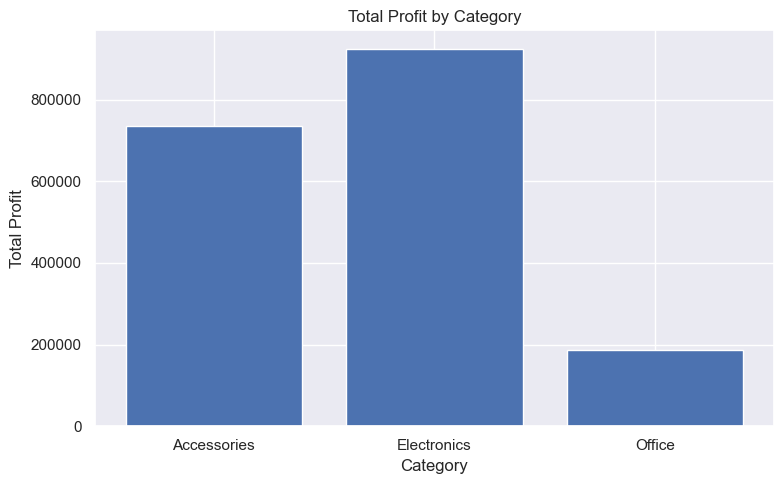

In [19]:
# Category-wise aggregation

category_summary=(
    df.groupby('Category')
    .agg({
        'Sales':'sum',
        'Profit':'sum',
        'Quantity':'sum'
    })
    .reset_index()
)

print(category_summary)

# Category-wise Sales 
plt.figure(figsize=(8,5))
plt.bar(category_summary['Category'],category_summary['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Category-wise Profit 
plt.figure(figsize=(8,5))
plt.bar(category_summary['Category'],category_summary['Profit'])
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

  Region    Sales     Profit  Quantity
0   East  2675110  464888.46      4306
1  North  2488773  426314.75      4106
2  South  2659548  458103.27      4361
3   West  2844450  495358.73      4488


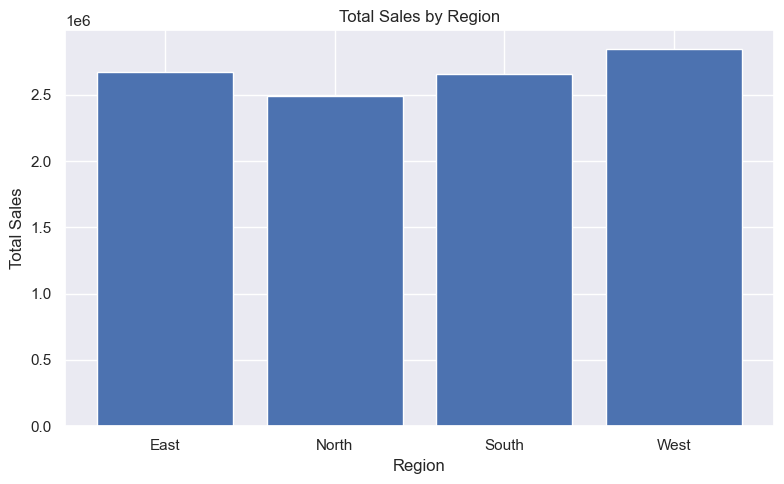

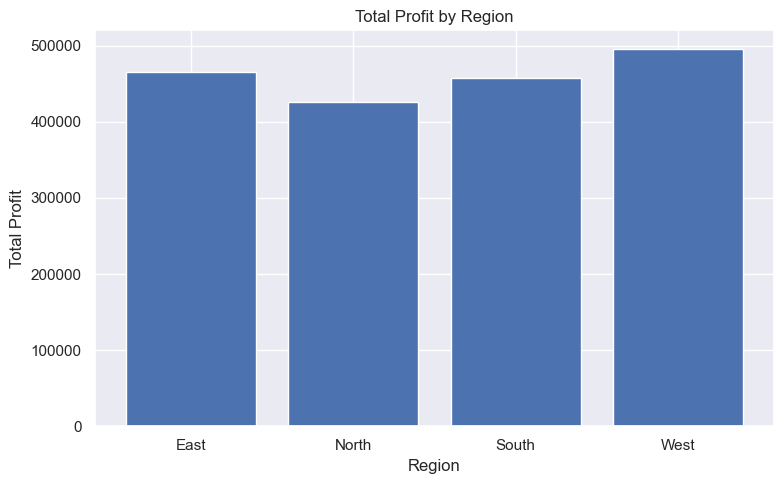

In [20]:
# Region-wise aggregation
region_summary=(
    df.groupby('Region')
    .agg({
        'Sales':'sum',
        'Profit':'sum',
        'Quantity':'sum',
    })
    .reset_index()
)
print(region_summary)

# Region-wise Sales
plt.figure(figsize=(8,5))
plt.bar(region_summary['Region'], region_summary['Sales'])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Region-wise Profit
plt.figure(figsize=(8,5))
plt.bar(region_summary['Region'], region_summary['Profit'])
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

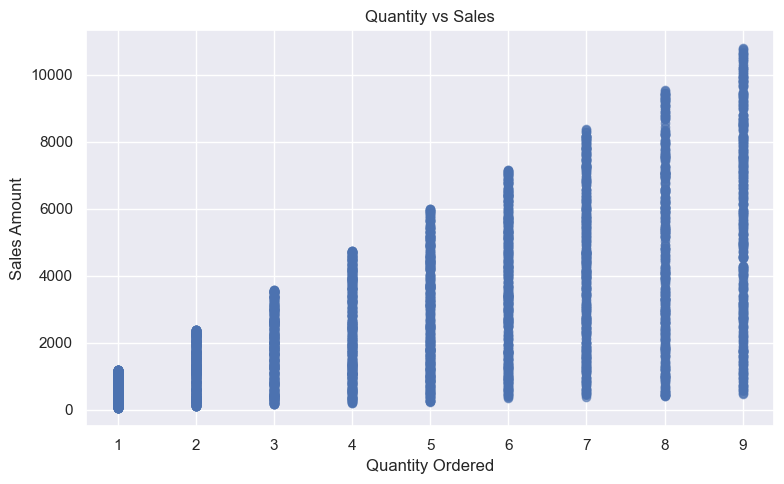

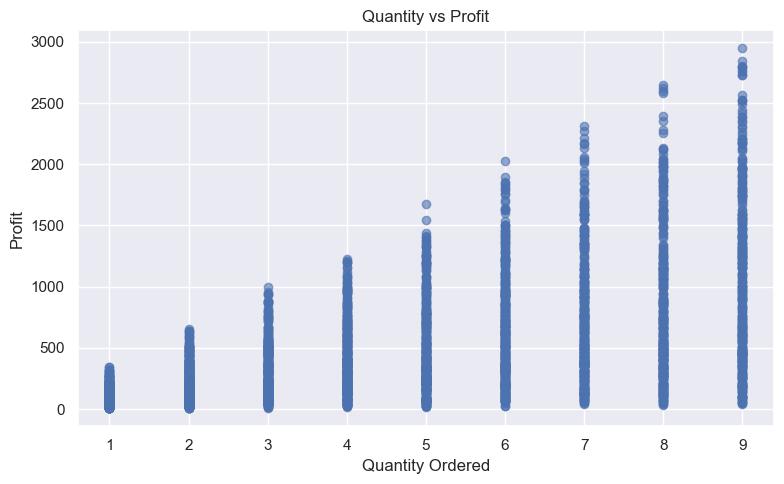

In [24]:
# Quantity vs Sales
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.6)
plt.title("Quantity vs Sales")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

# Quantity vs Profit
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Profit'], alpha=0.6)
plt.title("Quantity vs Profit")
plt.xlabel("Quantity Ordered")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()